# Introduction

In today's fast-moving music industry, where streaming platforms determine much of a song's success, understanding what makes a song popular has become more important than ever. Our final project aims to take a data driven approach to analyze different factors that influence a song's popularity and aims to build a model that can predict what makes a song popular and why. 

# About the Data

We will be using a dataset from Kaggle that contains over 13,000 songs along with several parameters and measurable features. Each song entry includes both quantitative features, such as acousticness, danceability, energy, instrumentalness, loudness, speechiness, tempo, and valence, as well as metadata like genre, artist name, and release year. The target variable in this dataset is the song's popoularity score that represents how well the song performed.

We believed this dataset was a great set to use for regression modeling. Due to the mix of numerical and categorical variables, we will be using 3 different regression models (Linear, Random Forest, Gradient Boosting) to evaluate the different performances. We plan to test and compare these models to see which best captures the relationship between the different parameters and listener engagement.

# Our Goal

Our goal is to do more than build a model, we want more insight into song's popularity. We aim to answer which features matter most? Are there any unexpected patterns in what makes a song rise in popularity? Which genres tend to produce the most popular songs? 

The ultimate goal though is to not just predict song success, but to uncover any unexpected patterns and translate those into meaningful insights. This data could be valuable for several different industries and fields, increasing more hit songs. We hope to gain a deeper understanding of popularity, trends, and what shapes the music we all know and listen to today.

# Pre-Processing

In [1]:
import pandas as pd 
df = pd.read_csv("song_data.csv")

In [2]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [4]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [5]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Only thing of note is that song_name is an object so we'll drop that in order to avoid any issues with the modeling.

In [6]:
df = df.drop('song_name', axis = 1);

# Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Define our predictors (X) and regressor (Y)

X = df.drop('song_popularity', axis =1)
Y = df['song_popularity']

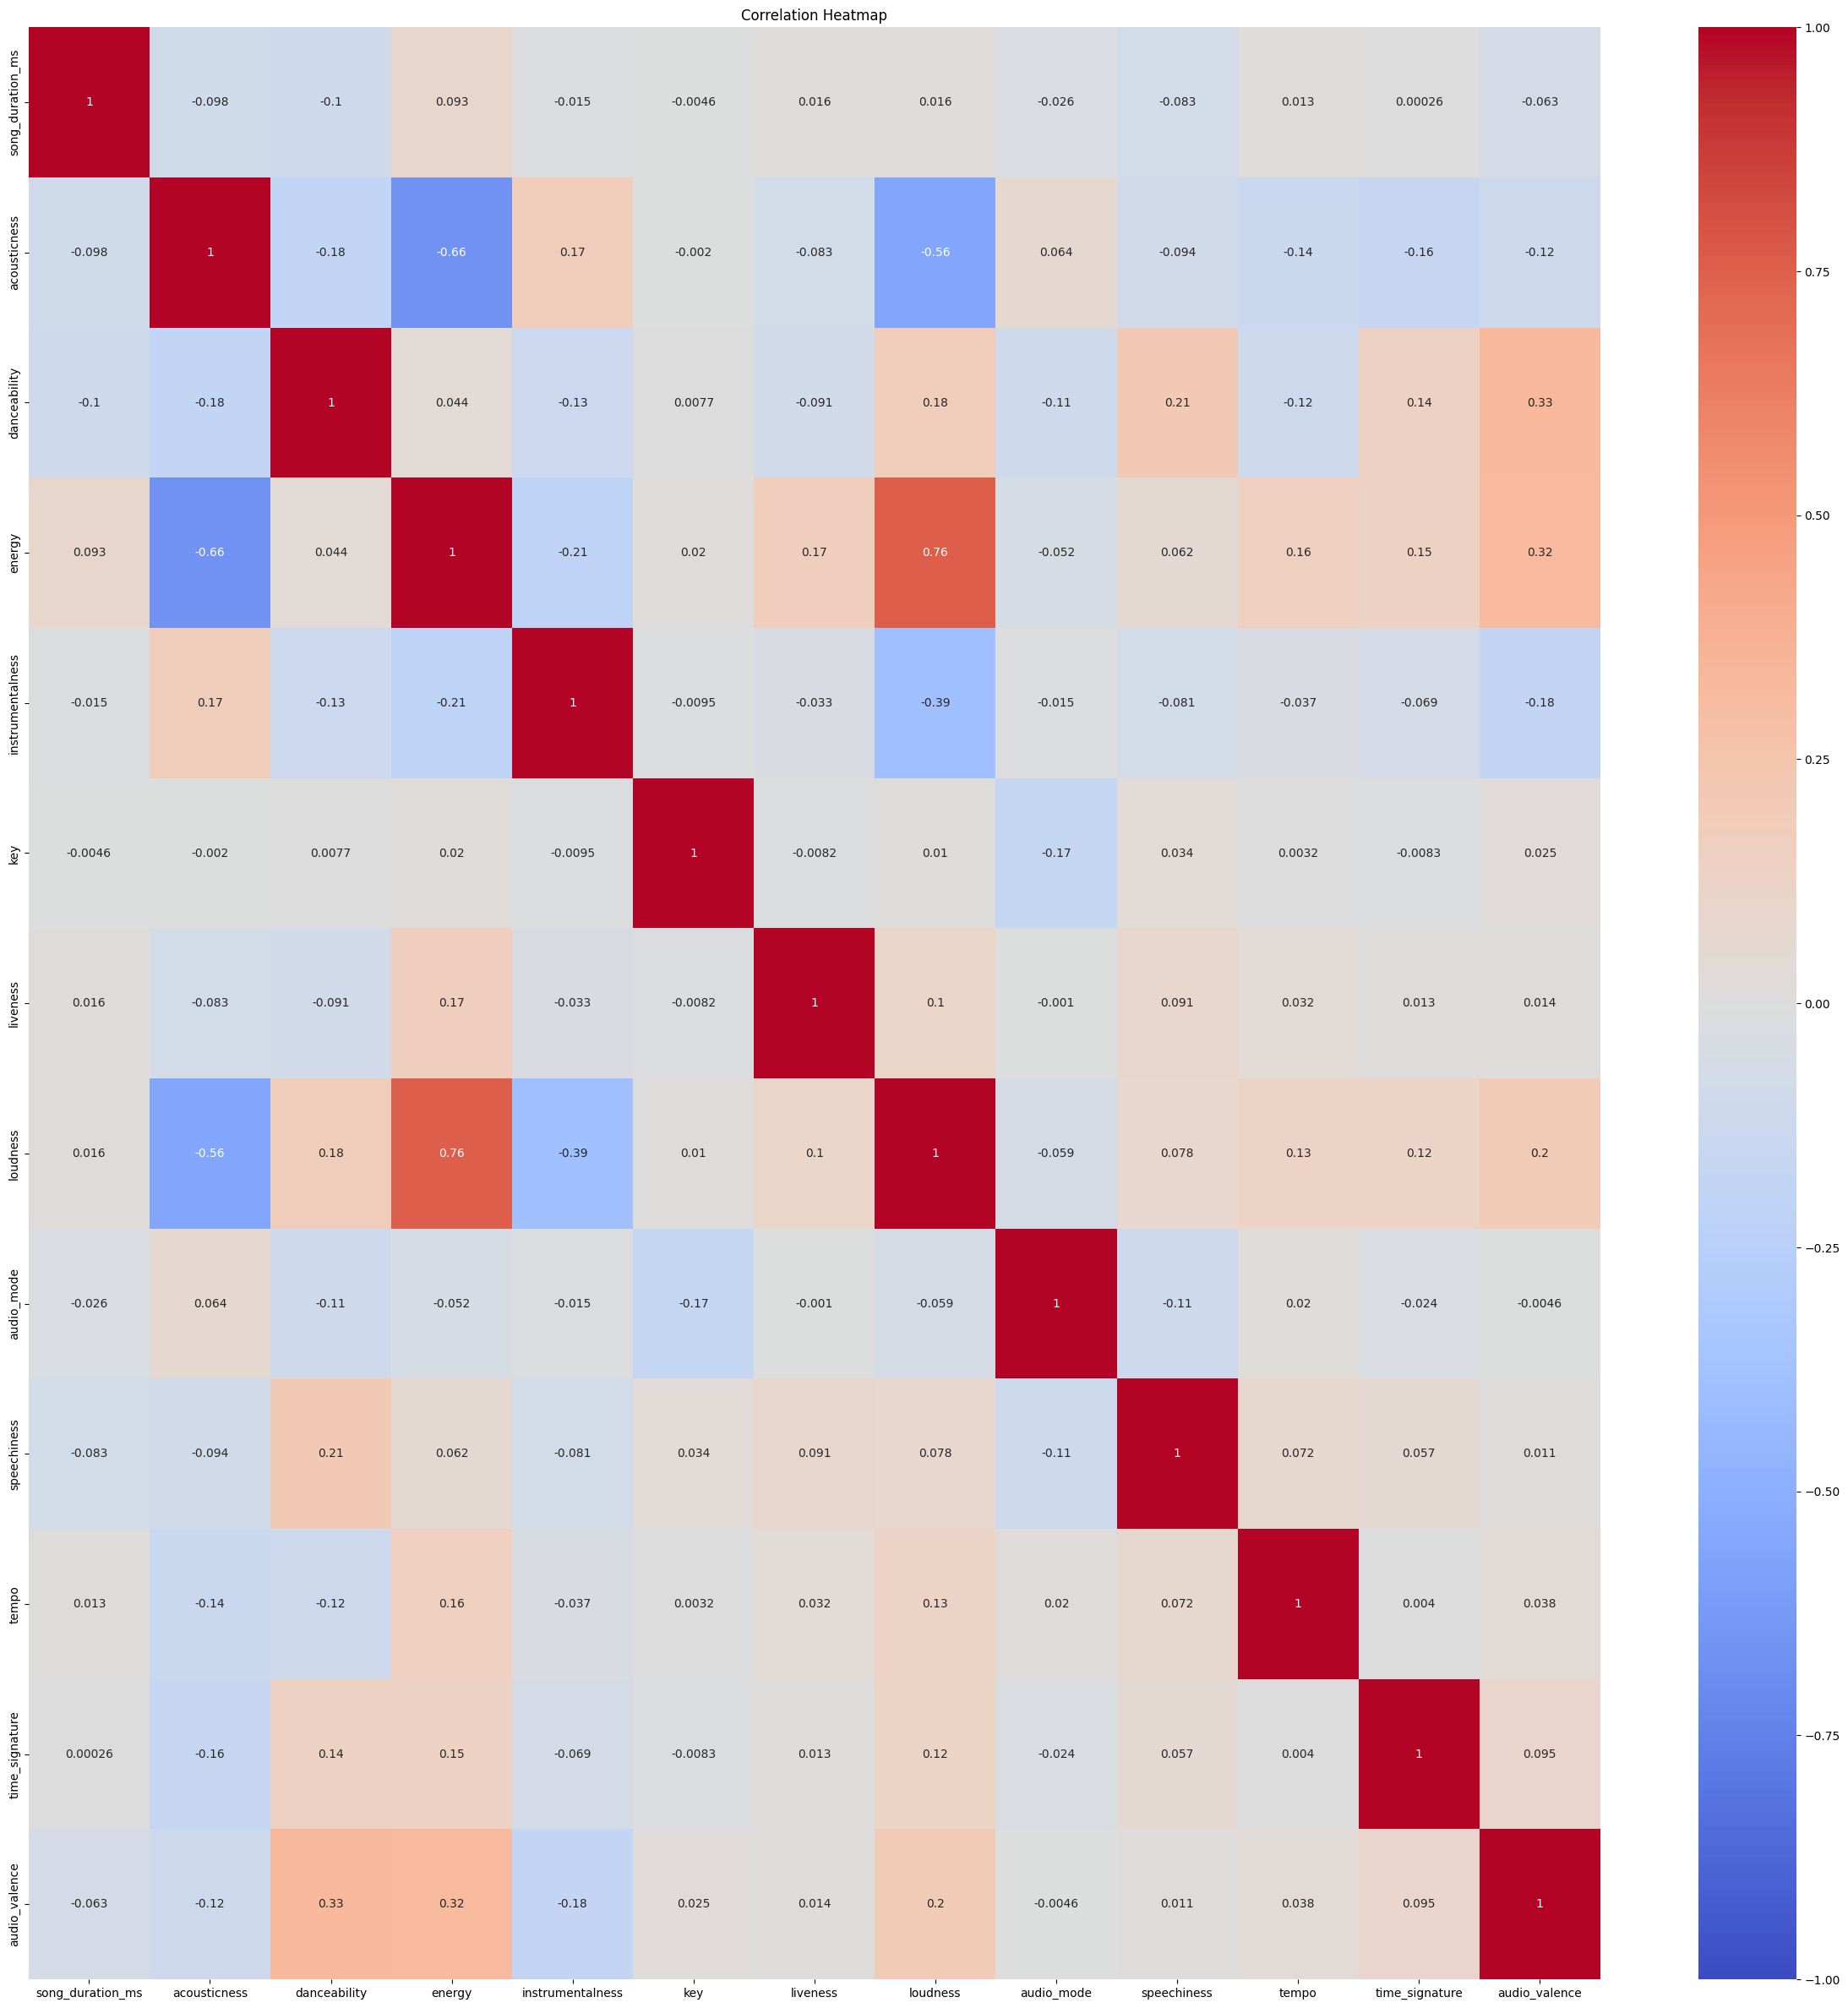

In [9]:
# Visualization 1: Correlation Matrix

corr_matrix = X.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There is some correlation amongst our X variables, which could potentially lead to some issues during modeling. 